# Exploratory data analysis¶

In [72]:
# Load Packages
import pandas as pd
import altair as alt 
import matplotlib as plt
import numpy as np
from sklearn.model_selection import train_test_split
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [73]:
def mds_special():
    font = "Arial"
    axisColor = "#000000"
    gridColor = "#DEDDDD"
    return {
        "config": {
            "title": {
                "fontSize": 24,
                "font": font,
                "anchor": "start", # equivalent of left-aligned.
                "fontColor": "#000000"
            },
            "header": {
                "fontSize": 14,
                "labelFontSize": 14,
                "titleFontSize": 14
            },
            "legend": {
                "fontSize": 14,
                "labelFontSize": 14,
                "titleFontSize": 14
            },
            'view': {
                "height": 300, 
                "width": 400
            },
            "axisX": {
                "domain": True,
                #"domainColor": axisColor,
                "gridColor": gridColor,
                "domainWidth": 1,
                "grid": False,
                "labelFont": font,
                "labelFontSize": 14,
                "labelAngle": 0, 
                "tickColor": axisColor,
                "tickSize": 5, # default, including it just to show you can change it
                "titleFont": font,
                "titleFontSize": 16,
                "titlePadding": 10, # guessing, not specified in styleguide
                "title": "X Axis Title (units)", 
            },
            "axisY": {
                "domain": False,
                "grid": True,
                "gridColor": gridColor,
                "gridWidth": 1,
                "labelFont": font,
                "labelFontSize": 14,
                "labelAngle": 0, 
                #"ticks": False, # even if you don't have a "domain" you need to turn these off.
                "titleFont": font,
                "titleFontSize": 16,
                "titlePadding": 10, # guessing, not specified in styleguide
                "title": "Y Axis Title (units)", 
                # titles are by default vertical left of axis so we need to hack this 
                #"titleAngle": 0, # horizontal
                #"titleY": -10, # move it up
                #"titleX": 18, # move it to the right so it aligns with the labels 
            },
        }
            }

# register the custom theme under a chosen name
alt.themes.register('mds_special', mds_special)

# enable the newly registered theme
alt.themes.enable('mds_special')
#alt.themes.enable('none') # to return to default

ThemeRegistry.enable('mds_special')

## 1. Describe the dataset

- The Breast Cancer Data Set is obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer).

- This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature.
     (See also lymphography and primary-tumor.)
     
- This data set includes 201 instances of one class and 85 instances of another class. The instances are described by 9 attributes, some of which are linear and some are nominal.

## 2. Load the dataset 

In [74]:
# Load the dataset 
# breast_quad: the quadrant of the breast
df = pd.read_csv("../data/raw_data/breast_cancer_raw.csv")
df.columns = ["Class", "age", "menopause", "tumor_size", "inv_nodes", "node_caps", "deg_malig", "breast", "breast_quad", "irradiat"]
# Replace ? with NaN because it's easier to work with them 
df = df.replace('?', np.nan)
# Split data 
df_train, df_test = train_test_split(df, test_size=0.20, random_state=100)

In [75]:
df_train.head()

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
236,recurrence-events,30-39,premeno,35-39,0-2,no,3,left,left_low,no
134,no-recurrence-events,30-39,premeno,40-44,3-5,no,3,right,right_up,yes
88,no-recurrence-events,30-39,premeno,0-4,0-2,no,2,right,central,no
225,recurrence-events,50-59,premeno,30-34,0-2,no,3,right,left_up,yes
31,no-recurrence-events,50-59,ge40,10-14,0-2,no,1,right,left_up,no


## 3. Explore the dataset 

In [76]:
print("- There are two classes of breast cancer: ", list(df_train["Class"].dropna().unique()), "\n")
print("- The groups of age are: ", sorted(list(df_train["age"].dropna().unique())), "\n")
print("- The menopause times are: ", list(df_train["menopause"].dropna().unique()), "\n")
print("- The groups of patients' tumor size are:", list(df_train["tumor_size"].dropna().unique()), "\n") 
print("- The ranges of the number of axillary lymph nodes that contain metastatic breast cancer visible on histological examinationare are: "\
      , list(df_train["inv_nodes"].dropna().unique()), "\n")
print("- The degree of malignancy ranging form {0}-{1}".format(df_train["deg_malig"].dropna().min(), df_train["deg_malig"].max()), "\n") 
print("- There are {0} patient's node is present in cap of the breast out of {1}".format(df[df["node_caps"] == 'yes']["node_caps"].count(), df_train["node_caps"].count()), "\n") 
print("- The quadrants of the breast are: ", list(df_train["breast_quad"].dropna().unique()), "\n")
print("- There are {0} patients are used to be treated with radiation therapy while {1} patients are not".format(df[df["irradiat"] == 'yes']["irradiat"].count(), df_train[df_train["irradiat"] == 'no']["irradiat"].count()), "\n") 

# deg_malig: Degree of malignancy
# inv_nodes: the number (range 0 - 39) of axillary lymph nodes that contain metastatic breast cancer visible on histological examination
# node_caps: if the cancer does metastasise to a lymph node, although outside the original site of the tumor it may remain “contained” 
#           by the capsule of the lymph node. However, over time, and with more aggressive disease, the tumor may replace the lymph node 
#           and then penetrate the capsule, allowing it to invade the surrounding tissues;

- There are two classes of breast cancer:  ['recurrence-events', 'no-recurrence-events'] 

- The groups of age are:  ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'] 

- The menopause times are:  ['premeno', 'ge40', 'lt40'] 

- The groups of patients' tumor size are: ['35-39', '40-44', '0-4', '30-34', '10-14', '15-19', '20-24', '25-29', '50-54', '5-9', '45-49'] 

- The ranges of the number of axillary lymph nodes that contain metastatic breast cancer visible on histological examinationare are:  ['0-2', '3-5', '6-8', '15-17', '24-26', '9-11', '12-14'] 

- The degree of malignancy ranging form 1-3 

- There are 56 patient's node is present in cap of the breast out of 222 

- The quadrants of the breast are:  ['left_low', 'right_up', 'central', 'left_up', 'right_low'] 

- There are 68 patients are used to be treated with radiation therapy while 174 patients are not 



In [77]:
# View the training dataset 
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 236 to 8
Data columns (total 10 columns):
Class          227 non-null object
age            227 non-null object
menopause      227 non-null object
tumor_size     227 non-null object
inv_nodes      227 non-null object
node_caps      222 non-null object
deg_malig      227 non-null int64
breast         227 non-null object
breast_quad    226 non-null object
irradiat       227 non-null object
dtypes: int64(1), object(9)
memory usage: 19.5+ KB


In [78]:
df_train.describe() 

,deg_malig
count,227.000000
mean,2.052863
std,0.732814
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


## 4. Initial thought 
> - There are 227 examples in the training dataset where `node_caps` has 5 missing and `breast_quad` has 1 missing value. 
> - There is one numerical variable `deg_malig` and 9 categorical variables.
> - The training dataset is unbalance.

In [79]:
df_train.head()

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
236,recurrence-events,30-39,premeno,35-39,0-2,no,3,left,left_low,no
134,no-recurrence-events,30-39,premeno,40-44,3-5,no,3,right,right_up,yes
88,no-recurrence-events,30-39,premeno,0-4,0-2,no,2,right,central,no
225,recurrence-events,50-59,premeno,30-34,0-2,no,3,right,left_up,yes
31,no-recurrence-events,50-59,ge40,10-14,0-2,no,1,right,left_up,no


## 5. Wrangling

In [80]:
# Average the tumor size
df_train['min_tumor_size'], df_train['max_tumor_size'] = df_train['tumor_size'].str.split('-', 1).str

df_train['min_tumor_size'] = pd.to_numeric(df_train['min_tumor_size'])

df_train['max_tumor_size'] = pd.to_numeric(df_train['max_tumor_size'])

df_train["avg_tumor_size"] = (df_train['min_tumor_size']+df_train['max_tumor_size'])/2

df_train = df_train.drop(columns = ["tumor_size", "min_tumor_size", "max_tumor_size"])


# change inv_node from categorical variable to numerical values by taking the average 
df_train['min_inv_nodes'], df_train['max_inv_nodes'] = df_train['inv_nodes'].str.split('-', 1).str

df_train['min_inv_nodes'] = pd.to_numeric(df_train['min_inv_nodes'])

df_train['max_inv_nodes'] = pd.to_numeric(df_train['max_inv_nodes'])

df_train["avg_inv_nodes"] = (df_train['min_inv_nodes']+df_train['max_inv_nodes'])/2

df_train = df_train.drop(columns = ["inv_nodes", "min_inv_nodes", "max_inv_nodes"])

# Drop missing values
df_train = df_train.dropna()
# Store clean training dataset
df_train.to_csv("../data/clean_data/breast_cancer_clean_train.csv", index=False)

/Users/haoyusu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/haoyusu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/haoyusu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



## 6. Data Analysis & Visualizations

In [81]:
rec = df_train.query('Class == "recurrence-events"')['Class'].count()
nrec = df_train.query('Class == "no-recurrence-events"')['Class'].count()

pd.DataFrame({'Class': ['recurrence-events', 'no-recurrence-events'],
              'Number': [rec, nrec],
              'Portion': [rec/(rec + nrec), nrec/(rec + nrec)]})

,Class,Number,Portion
0,recurrence-events,62,0.280543
1,no-recurrence-events,159,0.719457


In [61]:
# Plot1: no-recurrence-events VS recurrence-events
plt1 = alt.Chart(df_train).mark_bar().encode(
    alt.X("Class:N"),
    alt.Y("count()", title = "Number of patients"),
).properties(width=300, height=200, title = "no-recurrence-events VS recurrence-events")

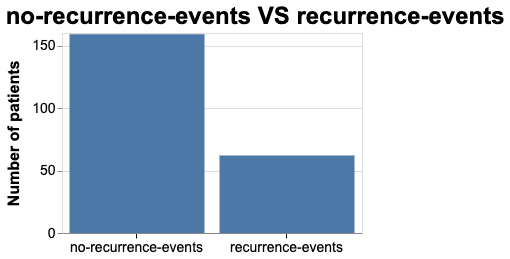

In [62]:
plt1

> Most breast cancer are non-current. The occurrence of no recurrent events is approximately as three times as many then the occurrence of recurrent events. The dataset is unbalance.

In [63]:
# Plot all categorical features against targets
def plot_categorical(feature_name, title_name):
    '''
    Make a bar plot of feature_name with the title of title_name
    
    Parameters
    ---
    feature_name: Str
        the name to be used as feature
    title_name: Str
        the name to be used as title 
    '''
    plt = alt.Chart(df_train).mark_bar().encode(
        alt.X(feature_name, type = 'nominal', axis = alt.Axis(labelAngle = 45), title=feature_name),
        alt.Y("count()", title = "Number of patients"),
        alt.Column("Class")
    ).properties(width=200, height=200, title = title_name)
    
    return plt

In [64]:
# Plot 2-7
plt2 = plot_categorical("menopause", "Recurrence vs. menopause")
plt3 = plot_categorical("age", "Recurrence vs. age")
plt4 = plot_categorical("node_caps", "Recurrence vs. node_caps")
plt5 = plot_categorical("deg_malig", "Recurrence vs. deg_malig")
plt6 = plot_categorical("breast_quad", "Recurrence vs. breast_quad")
plt7 = plot_categorical("irradiat", "Recurrence vs. irradiat treatment")

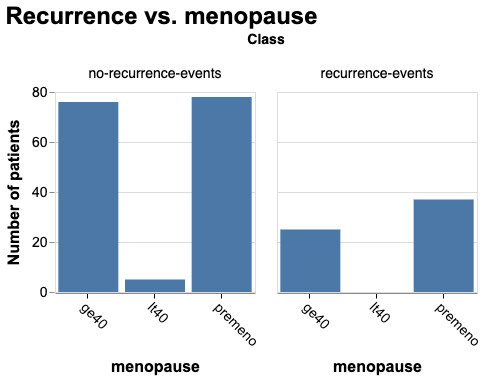

In [65]:
plt2

> Only a few patients in the train data set end menstrual cycles before 40. Patients of the `Premeno` category are more likely to have breast cancer recurrence events.

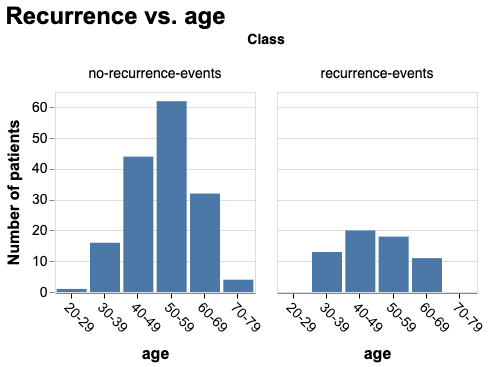

In [66]:
plt3

> Most patients in the train data set are in the age 50-59 group and their breast cancers are more likely to be non-recurrent. Patients at ages 30-39 are more likely to have breast cancer recurrence than other age groups.

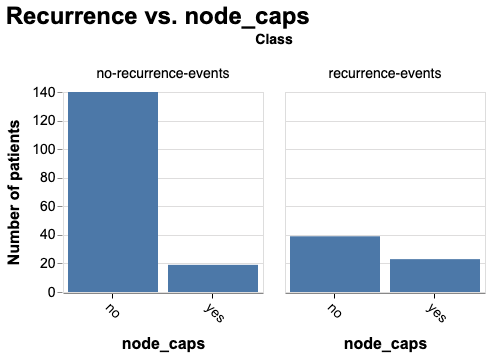

In [67]:
plt4

> patient with no node presenting in cap are more likely to have no recurrence events

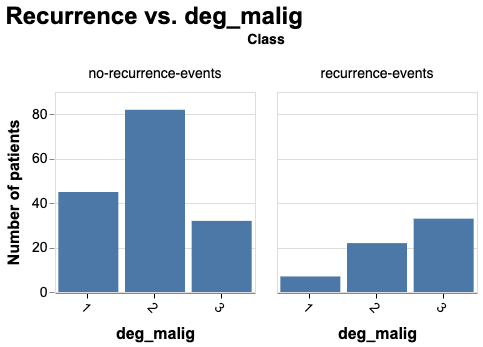

In [68]:
plt5

> Patients who have the highest drgree of malignancy are more likely to have recurrence events. The number of patients who have the second level of degree of malignancy is the largest.

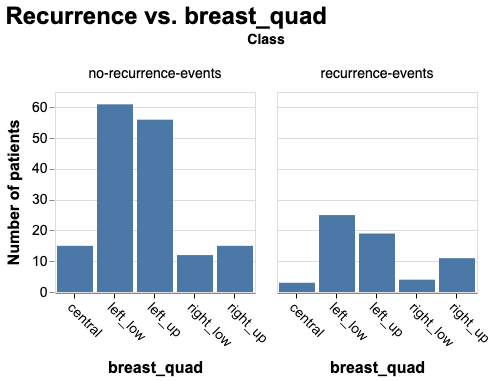

In [69]:
plt6

> Cancers are more likely to grow on left low and left up position while they are least likely to grow an the central position. Position seems to do nothing with the whether recurrence or not.

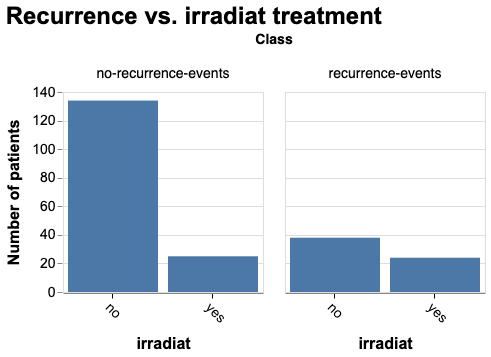

In [70]:
plt7

> Patients who have taken radiation therapy are more likely to have no recurrence events while patients who have not taken radiation therapy are more likely to have recurrence events.

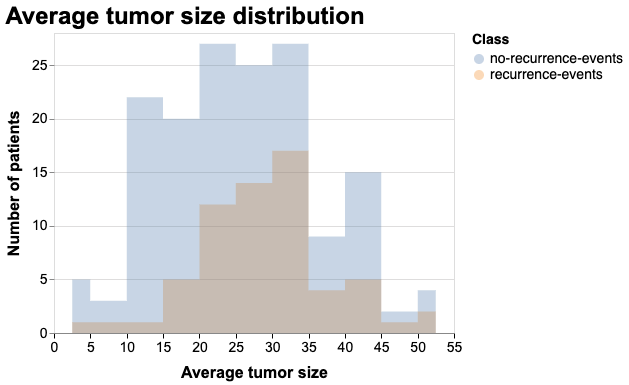

In [71]:
# Plot numeric features against target
alt.Chart(df_train).mark_area(
    opacity=0.3,
    interpolate='step',
).encode(
    alt.X("avg_tumor_size:Q", bin=alt.Bin(), title = "Average tumor size"),
    alt.Y('count()', stack=None, title='Number of patients'),
    alt.Color('Class')
).properties(width=400, height=300, title="Average tumor size distribution")

> The distribution of average tumor size is approximately normally distributed. Patients who have tumor with average size between 20-25 is more likely to be non-recurrent. The mean of the average tumor size of patients with breast cancer recurrence is bigger than those without breast cancer recurrence. 